In [21]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [22]:
dataset= pd.read_csv("Churn_Modelling.csv")
dataset.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [24]:
# Drop specified columns
dataset = dataset.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'], axis=1)
# Check the updated DataFrame
dataset.head(5)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [25]:
input_data= dataset.iloc[:,:-1]
output_data= dataset.iloc[:,-1]

In [26]:
ss= StandardScaler()
input_data= pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)

In [27]:
input_data.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276


In [28]:
dataset.shape

(10000, 9)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

In [30]:
x_train.shape

(8000, 8)

In [31]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,-0.564197,-0.660018,-0.695982,0.324119,0.807737,-1.547768,-1.030670,-1.013811
4684,-0.284834,0.388871,-1.387538,-1.225848,0.807737,0.646092,0.970243,0.804921
1731,-0.512463,0.484225,-0.350204,-1.225848,0.807737,0.646092,-1.030670,-0.722147
4742,-1.495407,1.914528,1.032908,0.683816,0.807737,0.646092,0.970243,1.227481
4521,-0.936681,-1.136786,0.687130,0.777477,-0.911583,0.646092,0.970243,0.253524
...,...,...,...,...,...,...,...,...
6412,-0.502117,1.342407,-0.004426,0.349118,-0.911583,-1.547768,0.970243,-0.957298
8285,-0.429689,-1.327494,1.724464,-1.225848,-0.911583,-1.547768,0.970243,0.170498
7853,0.822271,0.770285,0.687130,-1.225848,-0.911583,0.646092,-1.030670,-1.160142
1095,0.429093,-0.946079,-0.350204,-1.225848,-0.911583,0.646092,-1.030670,-0.405759


In [32]:
import tensorflow

In [33]:
from keras.layers import Dense,BatchNormalization, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.regularizers import L2

In [34]:
ann= Sequential()

In [35]:
#ann.add(Dense(7, input_dim=8, activation="relu", kernel_regularizer=L2(l2=0.01)))
#ann.add(Dense(4, activation="relu"))
#ann.add(Dense(2, activation="relu"))
#ann.add(Dense(1, activation="sigmoid"))


ann.add(Dense(6, input_dim=8, activation="relu"))
ann.add(BatchNormalization())
#ann.add(Dropout(0.5))
ann.add(Dense(4, activation="relu"))
ann.add(BatchNormalization())
#ann.add(Dropout(0.5))
ann.add(Dense(2, activation="relu"))
ann.add(BatchNormalization())
#ann.add(Dropout(0.3))
ann.add(Dense(1, activation="sigmoid"))

C:\Users\ARFA TECH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [37]:
ann.fit(x_train,y_train, batch_size=100, epochs=60, validation_data=(x_test,y_test), callbacks=EarlyStopping())

Epoch 1/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.5481 - loss: 1.0708 - val_accuracy: 0.7735 - val_loss: 0.6134
Epoch 2/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6376 - loss: 0.7298 - val_accuracy: 0.8035 - val_loss: 0.5564
Epoch 3/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7283 - loss: 0.5866 - val_accuracy: 0.8035 - val_loss: 0.5245
Epoch 4/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7826 - loss: 0.5445 - val_accuracy: 0.8035 - val_loss: 0.5037
Epoch 5/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8004 - loss: 0.5134 - val_accuracy: 0.8035 - val_loss: 0.4878
Epoch 6/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7947 - loss: 0.5040 - val_accuracy: 0.8035 - val_loss: 0.4779
Epoch 7/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7961 - loss: 0.4887 - val_accuracy: 0.8035 - val_loss: 0.4703
Epoch 8/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7994 - loss: 0.4757 - val_accuracy: 0.8035 - val_loss

In [38]:
train_accuracy=ann.history.history["accuracy"]
test_accuracy=ann.history.history["val_accuracy"]

In [39]:
len(train_accuracy), len(test_accuracy)

(36, 36)

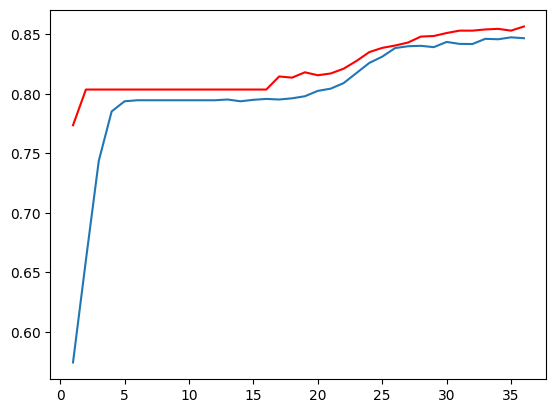

In [40]:
plt.plot([i for i in range(1,37)], train_accuracy)
plt.plot([i for i in range(1,37)], test_accuracy, c='red')
plt.show()


In [41]:
prd1= ann.predict(x_train)
prd_data1= []
for i in prd1 :
    if i[0] >0.5:
        prd_data1.append(1)
    else: 
        prd_data1.append(0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [42]:
prd= ann.predict(x_test)
prd_data= []
for i in prd :
    if i[0] >0.5:
        prd_data.append(1)
    else: 
        prd_data.append(0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [43]:
prd_data

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,


In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test,prd_data)*100

85.65

In [46]:
accuracy_score(y_train,prd_data1)*100

85.0875

In [47]:
import numpy as np

# Input data as a NumPy array
input_data = np.array([[-0.564197, -0.660018, -0.695982, 0.324119, 0.807737, -1.547768, -1.030670, -1.013811]])

# Make a prediction
prd = ann.predict(input_data)

# Convert predictions to binary values (0 or 1)
prd_data = [1 if i[0] > 0.5 else 0 for i in prd]

print(prd_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
[0]


In [48]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64